In [1]:
import math
import pandas as pd
from langdetect import detect
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import CountVectorizer
import math
import matplotlib.pyplot as plt

In [2]:
lem = WordNetLemmatizer() #create lemmatizer

In [3]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kseniapavlina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
dictionary = pd.read_csv('../data/processedDict.csv')
dictionary['word'] = dictionary['word'].apply(lambda x: lem.lemmatize(x, pos='n'))

In [5]:
dictionary

,word,cat_lev1,cat_lev2,cat_lev3,ndf
0,information,business,professional_conduct_host,advice,0.008904
1,recommendation,business,professional_conduct_host,advice,0.008375
2,tip,business,professional_conduct_host,advice,0.008399
3,advice,business,professional_conduct_host,advice,0.007568
4,suggestion,business,professional_conduct_host,advice,0.007580
...,...,...,...,...,...
347,talking,social,social_interaction,talking,0.001961
348,chatting,social,social_interaction,talking,0.001408
349,moment,social,social_interaction,talking,0.001155
350,chat,social,social_interaction,talking,0.000553


In [6]:
filepath = '../data/en_reviews/Manchester.csv'
reviews = pd.read_csv(filepath)

# reviews = reviews['date']
reviews

table = str.maketrans('', '', string.punctuation) #mapping to strip punctuation in review

#strip punct of each review -> lemmatise -> output is list of words so join into sentences
reviews['comments'] = reviews.comments.apply(lambda review: ' '.join(map(str, [lem.lemmatize(word.translate(table), pos='n') for word in review.lower().split()])))
reviews

reviews['date'] = pd.to_datetime(reviews['date'])

In [7]:
#### DELETE THIS LATER ###
mask = (reviews['date'] >= '2014-01-01') & (reviews['date'] < '2017-01-01')
# mask = (reviews['date'] >= '2014-01-01') & (reviews['date'] < '2017-01-01')
reviews = reviews.loc[mask].copy()
reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,langs
14,14,68951,10229418,2014-02-08,10652136,Justine,it a lovely house and awesome person you could...,en
15,15,68951,11050942,2014-03-18,9852319,Greg,all very nice clean and easy to check in and o...,en
16,16,68951,14658065,2014-06-23,10195882,Emma,we had a wonderful stay in peter and dellas lo...,en
17,17,68951,15670815,2014-07-14,13078630,David,we had the best experience in this house durin...,en
18,18,68951,17303401,2014-08-10,1669938,Libby,great accommodation warm welcome with a fridge...,en
...,...,...,...,...,...,...,...,...
86043,93320,22998816,114721823,2016-11-20,17891046,Jenna,good communication from hannah throughout the ...,en
86044,93321,22998816,115523089,2016-11-25,87436659,Robert,staying at the heart in medium city salford is...,en
86045,93322,22998816,115817172,2016-11-27,43982844,Norhana,clean neat and modern apartment checking in an...,en
86046,93323,22998816,116911347,2016-12-04,81715843,Jack,nice place easy check inout great location,en


In [8]:
reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,langs
14,14,68951,10229418,2014-02-08,10652136,Justine,it a lovely house and awesome person you could...,en
15,15,68951,11050942,2014-03-18,9852319,Greg,all very nice clean and easy to check in and o...,en
16,16,68951,14658065,2014-06-23,10195882,Emma,we had a wonderful stay in peter and dellas lo...,en
17,17,68951,15670815,2014-07-14,13078630,David,we had the best experience in this house durin...,en
18,18,68951,17303401,2014-08-10,1669938,Libby,great accommodation warm welcome with a fridge...,en
...,...,...,...,...,...,...,...,...
86043,93320,22998816,114721823,2016-11-20,17891046,Jenna,good communication from hannah throughout the ...,en
86044,93321,22998816,115523089,2016-11-25,87436659,Robert,staying at the heart in medium city salford is...,en
86045,93322,22998816,115817172,2016-11-27,43982844,Norhana,clean neat and modern apartment checking in an...,en
86046,93323,22998816,116911347,2016-12-04,81715843,Jack,nice place easy check inout great location,en


In [9]:
def get_trends_nice(category, subcats):
    years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
    allwords = reviews['comments'].tolist()
    allwords = " ".join(allwords)
    unique_words = set(allwords.split(' '))
    len(unique_words)

    unique_words = list(unique_words)
    unique_words = [string for string in unique_words if string != ""]
#     len(unique_words)

    ls = []
    for word in unique_words:
        word = ''.join([i for i in word if not i.isdigit()])
        ls += [word]
    unique_words= ls
    unique_words = [string for string in unique_words if string != ""]
    unique_words = list(dict.fromkeys(unique_words))

    def countWords(word, review):
        count = 0
        for i in review:
            if i == word:
                count+=1
        return count

    def getDenom(review, unique_words):
        count = 0
        den = 0
        ls = []
        review = review.split()
        for word in review:
            kmp = countWords(word, review)
            if (kmp > 0 and word not in ls):
                ls += [word]
                den += math.log(1 + kmp)
        return den

    reviews['den'] = reviews['comments'].apply(lambda x: getDenom(x, unique_words))

    def getNom(category, review, dictionary, cat_levl="cat_lev1"):
        nom = 0
        review = review.split()
        dictionaryWords = dictionary[(dictionary[cat_levl] == category)]
        dictionaryWords = dictionaryWords['word']
        for word in dictionaryWords:
            nom += math.log(1 + review.count(word))
        return nom

    reviews['temp'] = reviews['comments'].apply(lambda x: getNom(category, x, dictionary))
    reviews[category] = reviews['temp']*100/reviews['den']

    k = {}
    for subcat in subcats:
        temp = reviews['comments'].apply(lambda x: getNom(subcat, x, dictionary, cat_levl="cat_lev3"))
        reviews[subcat] = temp * 100 / reviews["den"]
        k[subcat] = reviews[subcat].loc[reviews[subcat] > 0].min()
        
    print(k)
    
    k_business= reviews[category].loc[reviews[category] > 0]
    k_business = k_business.min()
    print(k_business)

    def adoptionForSetOfReviews(category, setOfReviews, dictionary, startDate, endDate, k):
        adoption = 1
        mask = (setOfReviews['date'] >= startDate) & (setOfReviews['date'] < endDate)
        setOfReviews = setOfReviews.loc[mask]
        setOfReviews = setOfReviews[category]
        if (len(setOfReviews) == 0):
            return 0
        else:
            b = 1/len(setOfReviews)
            for review in setOfReviews:
                adoption *= math.pow((review + k),b)
            adoption = adoption - k
            return adoption

    d2 = {'year' : years, 'value':0.0}
    out = pd.DataFrame(data=d2)
    
    for i in range(len(years)):
        out.at[i, "value_{}".format(category)] = adoptionForSetOfReviews(category, reviews, dictionary, "{}-01-01".format(years[i]), "{}-01-01".format(years[i] + 1), k_business)
    return out

In [10]:
busi = get_trends_nice("business", [])

{}
1.5506988202813545


Text(0.5, 1.0, 'Manchester business')

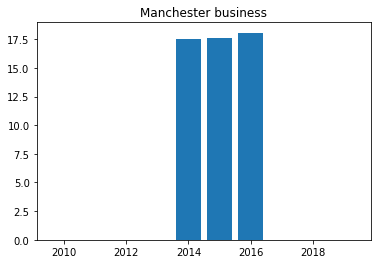

In [11]:
plt.bar(busi.year, busi.value_business)
plt.title('Manchester business')


In [12]:
soci = get_trends_nice("social", [])

{}
0.3888016161205252


Text(0.5, 1.0, 'Manchester social')

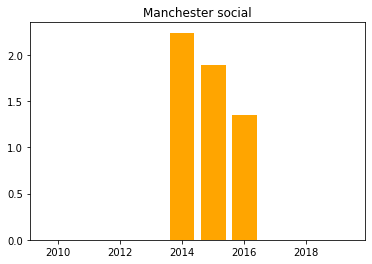

In [13]:
plt.bar(soci.year, soci.value_social, color = 'orange')
plt.title('Manchester social')
